In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0, 0.5, 'Height')

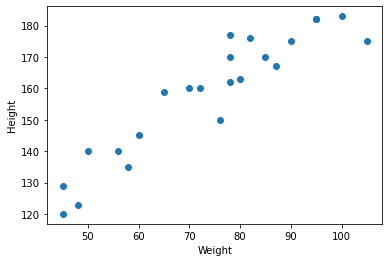

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [5]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [6]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [7]:
# Divide our dataset into independent and dependent features
X = df[['Weight']]
y = df['Height']

In [8]:
X.shape

(23, 1)

In [9]:
y.shape

(23,)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [12]:
X_train.shape, X_test.shape

((18, 1), (5, 1))

In [13]:
y_train.shape,y_test.shape

((18,), (5,))

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [17]:
X_test = scaler.transform(X_test)
print(X_test)

[[ 0.21043706]
 [ 0.21043706]
 [-1.6552288 ]
 [ 1.17153765]
 [-0.52452222]]


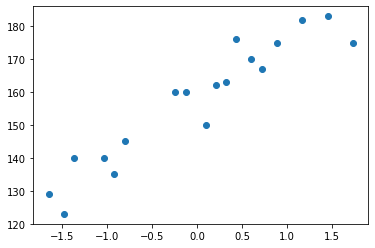

In [18]:
plt.scatter(X_train, y_train)

In [19]:
scaler.transform([[80]])

array([[0.32350772]])

In [20]:
## Model Traning

from sklearn.linear_model import LinearRegression

In [21]:
regg = LinearRegression()

In [22]:
# Traning the train data
regg.fit(X_train, y_train)

LinearRegression()

In [23]:
regg.intercept_

157.5

In [24]:
regg.coef_

array([17.03440872])

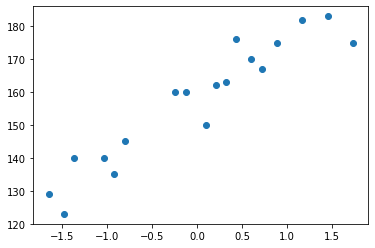

In [25]:
plt.scatter(X_train, y_train)

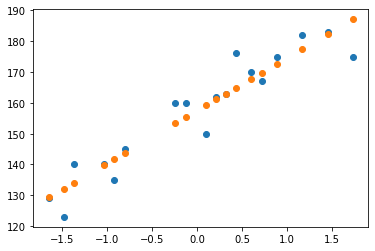

In [26]:
# Scatter plot
plt.scatter(X_train, y_train)
plt.scatter(X_train, regg.predict(X_train))

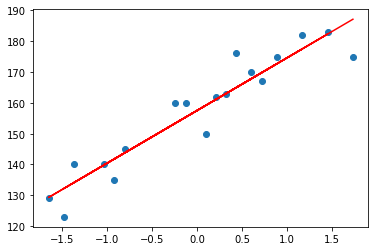

In [27]:
# Ploting
plt.scatter(X_train, y_train)
plt.plot(X_train, regg.predict(X_train),'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [28]:
## Predition for test data
y_pred_test = regg.predict(X_test)

In [29]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [30]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

#### Performance Metrics MAE, MSE, RMSE

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


#### Accuracy of the Model R squared and Adjusted R squared

In [33]:
from sklearn.metrics import r2_score

In [34]:
score = r2_score(y_test, y_pred_test)
score

0.7769869860423441

In [35]:
# Displaying adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

#### We used tow models

In [36]:
scaler

StandardScaler()

In [37]:
regg

LinearRegression()